In [1]:
import numpy as np
import pandas as pd 

import random
import sys
import matplotlib.pyplot as plt 
%matplotlib inline

sys.path.insert(1,'D:\\thesis-main\codes')
import time

from package.loadDb import *
from package.featureSelection_TENSORIZED import *
from package.featureSelection_TEMPORAL_PAGERANK import *
from package.featureSelection_SICE import *
from package.DiPCA.DIPCA import *
from package.trmf import *
from package.trmf_regressor import *

from package.regressors import *


## KAGGLE

In [2]:
# # import kaggle dataset
# dataset_name="energy daemand"
# address = "..\database\kaggleDataFrame"
# data_with_target= load_kaggle_dataframe(address+"\dataframes.csv")
# # data_with_target=data_with_target.iloc[:4700]
# data_without_target = data_with_target.drop(['DEMAND'],axis=1)
# target=data_with_target.iloc[:,-1]
# print("data with target size = ",data_with_target.shape )

In [3]:
# any(data_with_target.nunique() == 1)
# data_with_target['Holiday_ID'].unique()

## STOCK MARKET

In [4]:
# # data with target column
# address = "..\database\stock market dataset"
# data_with_target=load_stock_market_dataframe(address+"\sample_normalized_with_target.csv")
# # data_with_target=data_with_target.iloc[:10000]
# data_without_target = data_with_target.drop(['TARGET'],axis=1)
# # data_without_target=data_with_target.iloc[:,:-1]
# target=data_with_target.iloc[:,-1]

# istanbul+stock+exchange
https://www.kaggle.com/datasets/uciml/istanbul-stock-exchange?resource=download

In [5]:
dataset_name="istanbul+stock+exchange"
address = "..\\database\\istanbul+stock+exchange\\data_akbilgic.xlsx"

data_with_target = pd.read_excel(address, parse_dates=['date'])

# Set date as the index
data_with_target.set_index('date', inplace=True)

# data_with_target=data_with_target.iloc[:2000]
data_without_target = data_with_target.drop(['NIKKEI'],axis=1)
target=data_with_target.iloc[:,5]


c:\Users\User.MORADI-PC\anaconda3\envs\tf\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## appliances+energy+prediction

In [6]:
# dataset_name="appliances+energy+prediction"
# address = "..\\database\\appliances+energy+prediction\\energydata_complete.csv"
# data_with_target =load_energydata_complete_dataframe(address)
# # data_with_target=data_with_target.iloc[:2000]
# data_without_target = data_with_target.drop(['Appliances'],axis=1)
# target=data_with_target.iloc[:,0]
# # data_with_target

In [7]:
# data_with_target

## gas+sensor+array+temperature+modulation

In [8]:
# dataset_name="gas+sensor+array+temperature+modulation"
# address='..\\database\\gas+sensor+array+temperature+modulation'
# filenamelist=['20160930_203718.csv', '20161001_231809.csv', '20161003_085624.csv', '20161004_104124.csv', 
#               '20161005_140846.csv', '20161006_182224.csv', '20161007_210049.csv', '20161008_234508.csv',
#               '20161010_095046.csv', '20161011_113032.csv', '20161013_143355.csv', '20161014_184659.csv',
#               '20161016_053656.csv']
# # Assuming the file name is in the format "20160930_203718.csv"
# filename = filenamelist[0]
# data_with_target=load_temperature_modulation(address,filename)
# data_without_target = data_with_target.drop(['CO (ppm)'],axis=1)
# target=data_with_target.iloc[:,0]


In [9]:
# data_without_target

In [10]:
# target[:5000].unique()

## gas+sensor+array+under+dynamic+gas+mixtures
### <!-- https://archive.ics.uci.edu/dataset/322/gas+sensor+array+under+dynamic+gas+mixtures -->

In [11]:
# address='..\\database\\gas+sensor+array+under+dynamic+gas+mixtures\\'
# file_path = 'ethylene_methane.txt'
# df = pd.read_csv(address+file_path, delim_whitespace=True)
# df.to_csv(address+"ethylene_methane.csv", index=False)

In [12]:
# dataset_name="gas+sensor+array+under+dynamic+gas+mixtures"

# address='..\\database\\gas+sensor+array+under+dynamic+gas+mixtures\\'
# filenamelist=["ethylene_CO.csv","ethylene_methane.csv"]
# filename = filenamelist[0]
# data_with_target=load_dynamic_gas_mixtures(address,filename)
# data_without_target = data_with_target.drop(['Ethylene_conc_(ppm)'],axis=1)
# target=data_with_target.iloc[:,1]


In [13]:
# data_with_target

In [14]:
# target

# RUN

In [15]:
#segment sizes
interval=50 #600
testSize=int(.2*interval)
#energy of pca to compute number of components
tol=.90
testSize

10

In [16]:
filtered_X = []
filtered_Y = []

for i in range(data_without_target.shape[0] // interval):
    start_index = i * interval
    end_index = start_index + interval

    X_datacut = data_without_target[start_index:end_index]
    Y_datacut = target[start_index:end_index]
    
    # Check if target has only one unique value
    if len(Y_datacut.unique()) == 1:
        continue  # Skip this segment
    
    # Check if any column in X_datacut has only one unique value
    if any(X_datacut.nunique() == 1):
        continue  # Skip this segment

    filtered_X.append(X_datacut)
    filtered_Y.append(Y_datacut)
    # display(X_datacut)
    # display(Y_datacut)
    print(X_datacut.isnull().values.any(),Y_datacut.isnull().values.any())
    # plt.figure(figsize=(10, 6))
    # plt.plot(Y_datacut.index, Y_datacut.values, marker='o', linestyle='-')
    # plt.title('target  Over Time')
    # plt.xlabel('Time')
    # plt.ylabel('target ')
    # plt.grid(True)
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()

data_without_target = pd.concat(filtered_X, axis=0)
target = pd.concat(filtered_Y, axis=0)


False False
False False
False False
False False
False False
False False
False False
False False
False False
False False


In [17]:
data_without_target.shape

(500, 8)

In [18]:
#dictionary contains rmse of test set of each segment for all methods
dict_rmse={}
dict_runtime={}

PCA

In [19]:
counter=0
pca_list=[]
num_comp_list=[]
runtime=[]
# while counter+interval <= data_without_target.shape[0]:
for i in range(data_without_target.shape[0]//interval):
    start_index=i*interval
    end_index=start_index+interval

    X_datacut=data_without_target[start_index:end_index]
    Y_datacut=target[start_index:end_index]
    # X_datacut=datacut.iloc[:,:-1]
    # Y_datacut=targetcut.iloc[:,-1]
    # print(counter,X_datacut.shape)
    st = time.time()
    X_transformed,eigenvalues=compute_pca(X_datacut,num_comp=None)
    et = time.time()
    num_comp=energy(eigenvalues,tol)
    X_pca=X_transformed[:,:num_comp]
    
    pca_rmse=xgboost_reg_error(X_pca,Y_datacut,testSize)

    pca_list.append(pca_rmse)##########################
    num_comp_list.append(num_comp)##########################

    elapsed_time = et - st
    runtime.append(elapsed_time)
    

    # counter+=interval
    
dict_rmse['PCA']=pca_list
dict_runtime["PCA_runtime"]=runtime

In [20]:
num_comp_list

[3, 3, 3, 3, 3, 3, 2, 3, 3, 3]

# NMF

In [21]:
# counter=0
# NMF_list=[]
# NMF_runtime=[]
# # while counter+interval <= data_without_target.shape[0]:
# for i in range(data_without_target.shape[0]//interval):
#     start_index=i*interval
#     end_index=start_index+interval

#     num_comp=num_comp_list[i]
    
#     X_datacut=data_without_target[start_index:end_index]
#     Y_datacut=target[start_index:end_index]
#     print(X_datacut.shape)
    
#     st = time.time()
    
#     nmf_model = NMF(n_components=num_comp, init='random', random_state=42)
#     X_NMF = nmf_model.fit_transform(X_datacut)
    
#     et = time.time()
    
#     X_NMF_df = pd.DataFrame(X_NMF, columns=[f'component_{i+1}' for i in range(num_comp)])
#     print(X_NMF_df.shape)
#     NMF_rmse=xgboost_reg_error(X_NMF,Y_datacut,testSize)

#     NMF_list.append(NMF_rmse)##########################

#     elapsed_time = et - st
#     NMF_runtime.append(elapsed_time)
    

#     # counter+=interval
    
# dict_rmse['NMF']=NMF_list
# dict_runtime["NMF"]=NMF_runtime

# TSFRESH feature selection

In [22]:
from tsfresh import  select_features,feature_selection


In [23]:
# counter=0
# TSFRESH_list=[]
# runtime=[]

# # while counter+interval <= data_without_target.shape[0]:
# for i in range(data_without_target.shape[0]//interval):
#     start_index=i*interval
#     end_index=start_index+interval
#     K=num_comp_list[i]
#     X_datacut=data_without_target[start_index:end_index]
#     Y_datacut=target[start_index:end_index]

#     st = time.time()
#     print(X_datacut.shape,Y_datacut.shape)
#     X_reduced=select_features(X_datacut, Y_datacut)
    
#     et = time.time()
    
#     X_TSFRESH=X_reduced.iloc[:,:K]
#     print("X_reduced",X_reduced.shape)
#     TSFRESH_rmse=xgboost_reg_error(X_TSFRESH,Y_datacut,testSize)

#     TSFRESH_list.append(TSFRESH_rmse)##########################

#     elapsed_time = et - st
#     runtime.append(elapsed_time)
    

#     # counter+=interval
    
# dict_rmse['TSFRESH']=TSFRESH_list
# dict_runtime["TSFRESH_runtime"]=runtime

# DiPCA

In [24]:
DiPCA_rmse_list=[]
runtime=[]
s_list = [1, 3,10, 20] #[1, 3,10,100,200]
counter=0
i=0
runtime_average=[]
# while counter+interval <= data_without_target.shape[0]:
for j in range(data_without_target.shape[0]//interval):
    start_index=j*interval
    end_index=start_index+interval
    
    K=num_comp_list[i]
    # K=10
    # display(data_without_target)
    constant_columns = [col for col in data_without_target.columns if data_without_target[col].nunique() == 1]

    # print("Constant columns:", constant_columns)
    data=data_without_target.to_numpy()
    data=data[start_index:end_index,:]
    
    target_cut=target.iloc[start_index:end_index]
    
    smallest_rmse = float('inf')  # Start with a very large number
    for s in s_list:
        st=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        
        data,_,_=autos(data)
            
        P, W, Theta, Ps, lambda_s, PHI_v, phi_v_lim, Ts2_lim, Qs_lim = DiPCA1(data, s, K)
        et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        elapsed_time = et - st

        # get reduced data
        new_features=transform_data(data, W[:, :K])
        # print(new_features.shape)
        rmse=xgboost_reg_error(new_features,target_cut,testSize)
        if rmse < smallest_rmse:
            smallest_rmse = rmse
        runtime.append(elapsed_time)
            
    DiPCA_rmse_list.append(smallest_rmse)
    runtime_average.append(np.mean(runtime))
    
        # counter+=interval
    i=i+1
    # print(i,K)
    # print("----------------------------------------------------------------------------")
dict_rmse['DiPCA']=DiPCA_rmse_list
dict_runtime["DiPCA_runtime"]=runtime_average


## TRMF

In [25]:
# trmf parameters..............................................
lags_list = [[1],[1,10],[1,10,30]]
# K = 4######### changes besed on pca energy
lambda_f = .1
lambda_x = .1
lambda_w = .1
alpha = 10
eta = .1
max_iteration=10000 
# num_comp=K

In [26]:
trmf_rmse_list=[]
runtime=[]

counter=0
i=0
runtime_average=[]
# while counter+interval <= data_without_target.shape[0]:
for j in range(data_without_target.shape[0]//interval):
    start_index=j*interval
    end_index=start_index+interval
    
    K=num_comp_list[i]

    data=data_without_target.to_numpy().T

    data=data[:,start_index:end_index]
    target_cut=target.iloc[start_index:end_index]

    T_train = data.shape[1]
    
    smallest_rmse = float('inf')  # Start with a very large number
    for lags in lags_list:
        st=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        data_normalized =normalized_data(data, T_train, 0, normalize=True)

        model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta)
        model.fit(data_normalized, max_iter = max_iteration)
        et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        elapsed_time = et - st
        
        
        runtime.append(elapsed_time)

        # get reduced data
        new_features=model.X.T
        
        rmse=xgboost_reg_error(new_features,target_cut,testSize)
        if rmse < smallest_rmse:
            smallest_rmse = rmse
        runtime.append(elapsed_time)
    trmf_rmse_list.append(smallest_rmse)
    runtime_average.append(np.mean(runtime))
    
    # counter+=interval
    i=i+1
    print(i,K)
    print("----------------------------------------------------------------------------")
dict_rmse['trmf_rmse']=trmf_rmse_list
dict_runtime["TRMF_runtime"]=runtime_average


1 3
----------------------------------------------------------------------------
2 3
----------------------------------------------------------------------------
3 3
----------------------------------------------------------------------------
4 3
----------------------------------------------------------------------------
5 3
----------------------------------------------------------------------------
6 3
----------------------------------------------------------------------------
7 2
----------------------------------------------------------------------------
8 3
----------------------------------------------------------------------------
9 3
----------------------------------------------------------------------------
10 3
----------------------------------------------------------------------------


## TEMPORAL PAGE RANK FEATURE SELECTION

In [27]:
window_size_list=[2,3,5,7,10,15,25]#[2,3,5,7,10,30]

In [28]:
dict_mse_tpr={}
dict_runtime_tpr={}
for window_size in window_size_list :
    method_list = []
    runtime=[]

    # counter=0
    i=0
    # while counter+interval <= data_without_target.shape[0]:
    for j in range(data_without_target.shape[0]//interval):
        start_index=j*interval
        end_index=start_index+interval

        num_comp=num_comp_list[i]

        X_datacut=data_without_target[start_index:end_index]
        Y_datacut=target[start_index:end_index]

        st=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        
        arr=create_graph_details(X_datacut,window_size)
        a=featureSelection_tpr(arr,X_datacut.shape[1],num_comp)
       
        et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        elapsed_time = et - st
        runtime.append(elapsed_time)


        mse_tpr=xgboost_reg_error(X_datacut[X_datacut.columns[a[0]]].values,Y_datacut,testSize)

        method_list.append(mse_tpr)
        #     print( "method_list",method_list)
        i=i+1
        # print(j)
        # print("----------------------------------------------------------------------------")
        # counter+=interval
    dict_mse_tpr["Temp-PR win={}".format(window_size)]=method_list
    dict_runtime_tpr["Temporal-PR win={}".format(window_size)]=runtime


dataframe_1 = pd.DataFrame(dict_mse_tpr)
dict_rmse['temp_PR_rmse']=list(dataframe_1.min(axis=1))
df_time_1=pd.DataFrame(dict_runtime_tpr)
dict_runtime["Temporal_pr_runtime"]=list(df_time_1.mean(axis=1))


## STATIC PR


In [29]:
dict_mse_sice={}
dict_runtime_sice={}

for window_size in window_size_list:
    method_list = []
    runtime=[]

    # counter=0
    i=0
    # while counter+interval <= data_with_target.shape[0]:
    for j in range(data_without_target.shape[0]//interval):
        start_index=j*interval
        end_index=start_index+interval

        num_comp=num_comp_list[i]


        datacut=data_without_target[start_index:end_index]
        Y_datacut=target[start_index:end_index]
        st=time.time()#>>>>>>>>>>>>>>>>>>>>>>

        selected_features_index=featureSelection(X_datacut,window_size)
        
        et=time.time()#>>>>>>>>>>>>>>>>>>>>>>
        elapsed_time = et - st
        runtime.append(elapsed_time)
        
        selected_data= X_datacut[X_datacut.columns[selected_features_index]].to_numpy()
        mse_sice=xgboost_reg_error(selected_data[:,:num_comp],Y_datacut,testSize)
        

        method_list.append(mse_sice)
        #     print( "method_list",method_list)
        i=i+1
        print(counter/interval)
        print("----------------------------------------------------------------------------")
        counter+=interval
    dict_mse_sice["sice win={}".format(window_size)]=method_list
    dict_runtime_sice["Static-PR win={}".format(window_size)]=runtime

dataframe_2 = pd.DataFrame(dict_mse_sice)
dict_rmse['static_PR_rmse']=list(dataframe_2.min(axis=1))
df_time_2=pd.DataFrame(dict_runtime_sice)
dict_runtime["Static_pr_runtime"]=list(df_time_2.mean(axis=1))

number of windows= 25 
size of windows = 2
[0.24668766366662603, 0.24381806955531088, 0.24134799527361717, 0.24437828559015567, 0.2490217038296058, 0.24152002068352424, 0.24783273229743902, 0.2434354553437474] [4, 6, 0, 3, 1, 7, 5, 2]
0.0
----------------------------------------------------------------------------
number of windows= 25 
size of windows = 2
[0.24668766366662603, 0.24381806955531088, 0.24134799527361717, 0.24437828559015567, 0.2490217038296058, 0.24152002068352424, 0.24783273229743902, 0.2434354553437474] [4, 6, 0, 3, 1, 7, 5, 2]
1.0
----------------------------------------------------------------------------
number of windows= 25 
size of windows = 2
[0.24668766366662603, 0.24381806955531088, 0.24134799527361717, 0.24437828559015567, 0.2490217038296058, 0.24152002068352424, 0.24783273229743902, 0.2434354553437474] [4, 6, 0, 3, 1, 7, 5, 2]
2.0
----------------------------------------------------------------------------
number of windows= 25 
size of windows = 2
[0.246687

<AxesSubplot: title={'center': 'energy=0.9'}, xlabel='segments', ylabel='RMSE'>

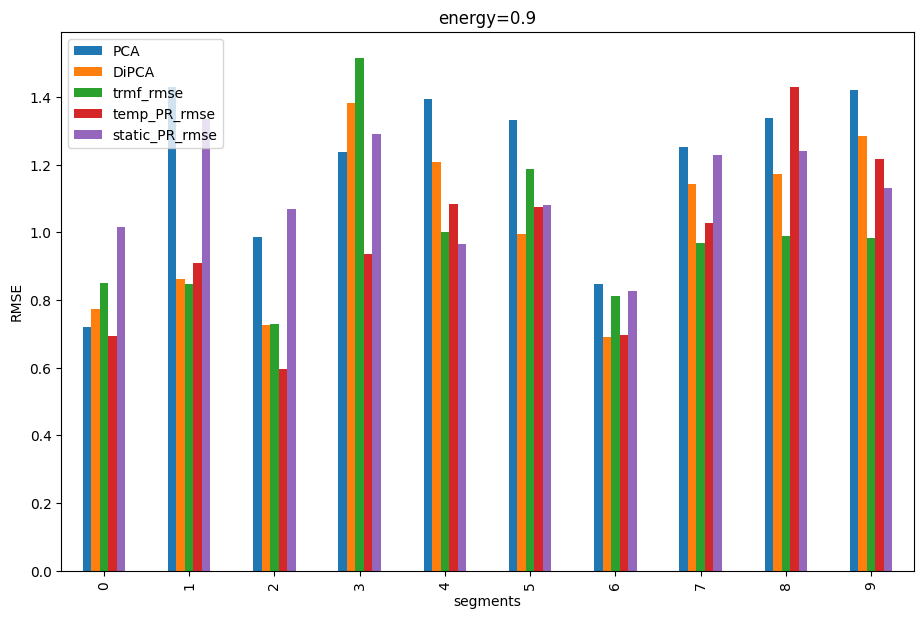

In [30]:
   
dataframe = pd.DataFrame(dict_rmse)
plt.rcParams["figure.figsize"] = [11,7]
# dataframe.plot(kind="bar",title="num_comp={}".format("."),ylabel='RMSE',xlabel="dataframe segments")
dataframe.plot(kind="bar",title="energy={}".format(tol),ylabel='RMSE',xlabel="segments")


In [31]:
print({key: len(value) for key, value in dict_rmse.items()})


{'PCA': 10, 'DiPCA': 10, 'trmf_rmse': 10, 'temp_PR_rmse': 10, 'static_PR_rmse': 10}


<AxesSubplot: title={'center': 'energy=0.9'}, xlabel='segments', ylabel='Time'>

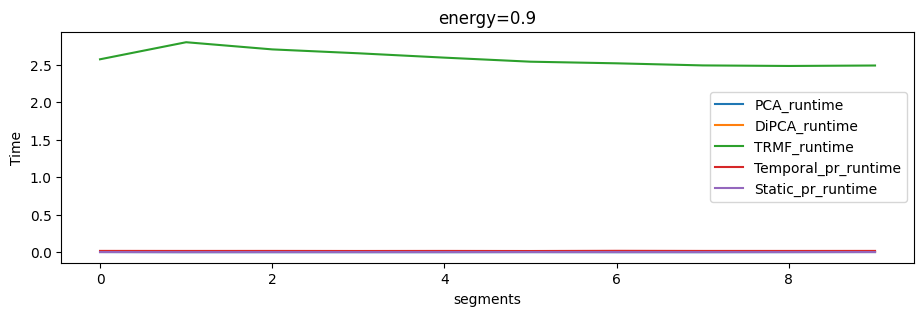

In [32]:
time_dataframe = pd.DataFrame(dict_runtime)
plt.rcParams["figure.figsize"] = [11,3]
time_dataframe.plot(kind="line",title="energy={}".format(tol),ylabel='Time',xlabel="segments")


In [33]:
time_dataframe = time_dataframe.rename(columns={'PCA_runtime': 'PCA','TRMF_runtime':'TRMF','Temporal_pr_runtime':'first-order similarities','Static_pr_runtime':'second-order similarities'})

time_dataframe

,PCA,DiPCA_runtime,TRMF,first-order similarities,second-order similarities
0,0.003989,0.007877,2.569818,0.019519,0.004417
1,0.001995,0.007804,2.797038,0.018949,0.004132
2,0.002003,0.009026,2.701574,0.019234,0.004417
3,0.001995,0.008702,2.649850,0.018379,0.004275
4,0.001995,0.008507,2.591824,0.019092,0.004559
5,0.002994,0.008336,2.537846,0.018094,0.004417
6,0.001995,0.007893,2.516247,0.020659,0.004560
7,0.001994,0.007748,2.488326,0.019092,0.004417
8,0.002992,0.007829,2.481019,0.018949,0.004132
9,0.003991,0.007769,2.487112,0.019377,0.004559


In [34]:

time_dataframe.loc['Mean'] =list(time_dataframe.mean())


In [35]:
num_comp_list

[3, 3, 3, 3, 3, 3, 2, 3, 3, 3]

In [36]:

no_feature_selection_list=[]

# while counter+interval <= data_without_target.shape[0]:
for i in range(data_without_target.shape[0]//interval):
    start_index=i*interval
    end_index=start_index+interval

    X_datacut=data_without_target[start_index:end_index]
    Y_datacut=target[start_index:end_index]
    
    no_feature_selection_rmse=xgboost_reg_error(X_datacut,Y_datacut,testSize)

    no_feature_selection_list.append(no_feature_selection_rmse)##########################

dataframe['no feature selection'] = no_feature_selection_list

In [37]:
dataframe = dataframe.rename(columns={'PCA': 'PCA','trmf_rmse':'TRMF','temp_PR_rmse':'first-order similarities','static_PR_rmse':'second-order similarities'})
dataframe

,PCA,DiPCA,TRMF,first-order similarities,second-order similarities,no feature selection
0,0.719821,0.774824,0.851862,0.692894,1.017464,0.808855
1,1.428721,0.862444,0.846326,0.909390,1.334191,1.105944
2,0.986978,0.726313,0.730539,0.595601,1.067976,1.210921
3,1.237223,1.383711,1.516973,0.936601,1.291416,1.417699
4,1.394421,1.208871,1.002636,1.084316,0.966629,1.159679
5,1.331552,0.996758,1.188251,1.074742,1.081823,1.020310
6,0.846237,0.690574,0.811349,0.697427,0.825647,0.981946
7,1.253120,1.143464,0.968829,1.028469,1.229007,1.221247
8,1.337829,1.173998,0.990052,1.430488,1.241422,1.603162
9,1.421719,1.286054,0.983812,1.216836,1.131720,1.105837


In [38]:
import pandas as pd

# Assuming you already have a DataFrame called `dataframe`

# Create a new DataFrame with the statistics you want to append
stats_df = pd.DataFrame({
    'Var': dataframe.var(),
    'Mean': dataframe.mean(),
    'Min': dataframe.min(),
    'Max': dataframe.max()
})

# Transpose it to match the original DataFrame layout and concatenate it
dataframe = pd.concat([dataframe, stats_df.T])

# Optional: Give appropriate labels to the new rows
dataframe.index = dataframe.index[:-4].tolist() + ['Var', 'Mean', 'Min', 'Max']


In [39]:
import os

directory = r"D:\thesis-main\codes\experiments\\"+address[12:]


# Create a subdirectory based on the 'tol' value
tol_directory = os.path.join(directory, str(tol)+dataset_name)
if not os.path.exists(tol_directory):
    os.makedirs(tol_directory)

# Define the filename with the desired format
name = "{}_{}_iters_staticpr=10000".format(dataset_name,tol)

# Save the time_dataframe to an Excel file
time_dataframe.to_excel(os.path.join(tol_directory, "time-{}.xlsx".format(name)))

# Save the dataframe to an Excel file
dataframe.to_excel(os.path.join(tol_directory, "RMSE-{}.xlsx".format(name)))

# Set plot size
plt.rcParams["figure.figsize"] = [29, 6]

# Plot time_dataframe and save
plot = time_dataframe[:-1].plot(kind="line", title="Feature Selection Time per Segment with energy={}".format(tol), ylabel='Time', xlabel="Segments")
plt.savefig(os.path.join(tol_directory, "plot_time-{}.png".format(name)))
plt.close()

# Plot RMSE dataframe and save
plot = dataframe[:-4].plot(kind="bar", title="RMSE Comparison of XGBoost Model After Feature Selection Using 4 Methods with energy={}".format(tol), ylabel='RMSE', xlabel="Segments")
plt.savefig(os.path.join(tol_directory, "plot_RMSE-{}.png".format(name)))
plt.close()
#??????????????????????
plot = dataframe[-4:].plot(kind="bar", title="Summary Statistics of RMSE Comparison of XGBoost Model for Feature Selection Methods with energy={}".format(tol), ylabel='RMSE', xlabel="Statistical Summary")
plt.savefig(os.path.join(tol_directory, "plot_RMSE_Summary-{}.png".format(name)))
plt.close()

variables = {
    'Variable Name': ['address', 'interval', 'tol', 'testSize', 'num_comp_list', 'lags_list', 
                       'lambda_f', 'lambda_x', 'lambda_w', 'alpha', 'eta', 'max_iteration', 
                       'window_size_list','s_list','data_without_target_size'],
    'Value': [address, interval, tol, testSize, num_comp_list, lags_list, 
              lambda_f, lambda_x, lambda_w, alpha, eta, max_iteration, window_size_list,s_list,data_without_target.shape]
}

# Create a DataFrame
df = pd.DataFrame(variables)

# Save to CSV
df.to_excel(os.path.join(tol_directory, 'variables.xlsx'), index=False)

In [40]:
time_dataframe

,PCA,DiPCA_runtime,TRMF,first-order similarities,second-order similarities
0,0.003989,0.007877,2.569818,0.019519,0.004417
1,0.001995,0.007804,2.797038,0.018949,0.004132
2,0.002003,0.009026,2.701574,0.019234,0.004417
3,0.001995,0.008702,2.649850,0.018379,0.004275
4,0.001995,0.008507,2.591824,0.019092,0.004559
5,0.002994,0.008336,2.537846,0.018094,0.004417
6,0.001995,0.007893,2.516247,0.020659,0.004560
7,0.001994,0.007748,2.488326,0.019092,0.004417
8,0.002992,0.007829,2.481019,0.018949,0.004132
9,0.003991,0.007769,2.487112,0.019377,0.004559


In [41]:
tol

0.9